In [624]:
# Installing necessary libraries
# !pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib as plt
import folium
import shapely
from shapely.geometry import LineString, Point
import numpy as np

# LOADING DATA INTO GEOPANDAS DATAFRAMES

### LOADING ECOLOGICAL DATASETS

1. DATASET WITH DATA ON NATIONAL PARKS


In [625]:
file_path = '/content/drive/MyDrive/Capstone Project/WDPA_WDOECM_Apr2025_Public_KEN_shp_0'


ecological = gpd.read_file(file_path)


/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'WDPA_WDOECM_Apr2025_Public_KEN_shp_0': 'WDPA_WDOECM_Apr2025_Public_KEN_shp-polygons' (default), 'WDPA_WDOECM_Apr2025_Public_KEN_shp-points'. Specify layer parameter to avoid this warning.
  result = read_func(


In [626]:
ecological.head()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry
0,752.0,752,1,Tsavo East,Tsavo East,National Park,National Park,National,II,Not Applicable,...,Kenya Wildlife Service,Not Reported,State Verified,933,Not Reported,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((38.4981 -3.16924, 38.49764 -3.16865,..."
1,753.0,753,1,Marsabit,Marsabit,National Reserve,National Reserve,National,Not Reported,Not Applicable,...,Kenya Wildlife Service,Not Reported,State Verified,933,Not Reported,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((38.06962 2.53188, 38.06917 2.52702, ..."
2,754.0,754,1,Sibiloi,Sibiloi,National Park,National Park,National,II,Not Applicable,...,Kenya Wildlife Service,Not Reported,State Verified,933,Not Reported,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((36.31357 3.66272, 36.31321 3.66271, ..."
3,755.0,755,1,Meru,Meru,National Park,National Park,National,II,Not Applicable,...,Kenya Wildlife Service,Not Reported,State Verified,933,Not Reported,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((38.35806 -0.07209, 38.35622 -0.07024..."
4,756.0,756,1,Aberdare,Aberdare,National Park,National Park,National,II,Not Applicable,...,Kenya Wildlife Service,Not Reported,State Verified,933,Not Reported,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((36.8224 -0.38875, 36.82218 -0.38882,..."


In [627]:
ecological.tail()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry
131,7647.0,7647,1,Marsabit,Marsabit,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Kenya Forest Service,Not Reported,State Verified,178,Not Reported,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((37.9416 2.32658, 37.95285 2.31344, 3..."
132,7648.0,7648,1,Mataa,Mataa,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Kenya Forest Service,Not Reported,State Verified,178,Not Reported,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((37.50127 -1.67646, 37.49832 -1.67796..."
133,7649.0,7649,1,Mathews Range,Mathews Range,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Kenya Forest Service,Not Reported,State Verified,178,Not Reported,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((37.2669 1.52429, 37.27764 1.49719, 3..."
134,7650.0,7650,1,Mau Narok,Mau Narok,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Kenya Forest Service,Not Reported,State Verified,178,Not Reported,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((35.99225 -0.60367, 35.99977 -0.60824..."
135,7651.0,7651,1,Menengai,Menengai,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Kenya Forest Service,Not Reported,State Verified,178,Not Reported,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((36.08591 -0.25707, 36.05941 -0.25277..."


In [628]:
#shape
print(ecological.shape)
print("Number of rows:", ecological.shape[0])
print("Number of columns:", ecological.shape[1])

(136, 31)
Number of rows: 136
Number of columns: 31


In [629]:
#datatypes
ecological.dtypes

,0
WDPAID,float64
WDPA_PID,object
PA_DEF,object
NAME,object
ORIG_NAME,object
DESIG,object
DESIG_ENG,object
DESIG_TYPE,object
IUCN_CAT,object
INT_CRIT,object


In [630]:
#columns
ecological.columns

Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ', 'geometry'],
      dtype='object')

<Axes: >

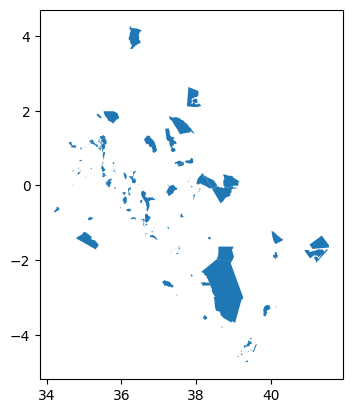

In [631]:
#plotting
ecological.geometry.plot()

2. DATASET WITH DATA ON FOREST RESERVES

In [632]:
for_reserves=gpd.read_file('/content/drive/MyDrive/Capstone Project/WDPA_WDOECM_Apr2025_Public_KEN_shp_1')

/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'WDPA_WDOECM_Apr2025_Public_KEN_shp_1': 'WDPA_WDOECM_Apr2025_Public_KEN_shp-polygons' (default), 'WDPA_WDOECM_Apr2025_Public_KEN_shp-points'. Specify layer parameter to avoid this warning.
  result = read_func(


* CHECKING DATA ATTRIBUTES

In [633]:
for_reserves.head()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry
0,7652.0,7652,1,Lower Imenti,Lower Imenti,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Kenya Forest Service,Not Reported,State Verified,178,KE-400,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((37.6779 0.14844, 37.67835 0.14697, 3..."
1,7654.0,7654,1,Metkei,Metkei,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Kenya Forest Service,Not Reported,State Verified,178,Not Reported,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((35.69617 0.17613, 35.67206 0.16885, ..."
2,7655.0,7655,1,Mkongani North,Mkongani North,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Kenya Forest Service,Not Reported,State Verified,178,Not Reported,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((39.35835 -4.28079, 39.35379 -4.29576..."
3,7656.0,7656,1,Mkongani West,Mkongani West,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Kenya Forest Service,Not Reported,State Verified,178,Not Reported,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((39.29273 -4.34974, 39.27798 -4.35685..."
4,7657.0,7657,1,Molo,Molo,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Kenya Forest Service,Not Reported,State Verified,178,Not Reported,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((35.74052 -0.26543, 35.74201 -0.26678..."


In [634]:
for_reserves.tail()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry
131,68332.0,68332,1,Kirima,Kirima,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Kenya Forest Service,Not Reported,State Verified,178,KE-200,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((36.47954 -0.18141, 36.48216 -0.18517..."
132,68334.0,68334,1,Muruai,Muruai,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Kenya Forest Service,Not Reported,State Verified,178,KE-200,KEN,KEN,Not Applicable,Not Applicable,"MULTIPOLYGON (((36.46056 -0.16053, 36.45653 -0..."
133,72283.0,72283,1,Imbirikani,Imbirikani,Community Conservancy,Community Conservancy,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,Not Reported,1714,KE-700,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((37.47262 -2.53979, 37.47259 -2.53977..."
134,72309.0,72309,1,Lumo,Lumo,Community Wildlife Sanctuary,Community Wildlife Sanctuary,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,Not Reported,1714,KE-300,KEN,KEN,Not Applicable,Not Applicable,"MULTIPOLYGON (((38.19095 -3.46243, 38.1968 -3...."
135,103549.0,103549,1,Lake Naivasha,Lake Naivasha,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(i)(ii)(iii)(iv),...,Not Reported,Management plan is implented and available,State Verified,1856,KE-700,KEN,KEN,Not Applicable,Not Applicable,"POLYGON ((36.41335 -0.80499, 36.37756 -0.82578..."


In [635]:
# shape
print(for_reserves.shape)
print("Number of rows:", for_reserves.shape[0])
print("Number of columns:", for_reserves.shape[1])

(136, 31)
Number of rows: 136
Number of columns: 31


In [636]:
#datatypes
for_reserves.dtypes

,0
WDPAID,float64
WDPA_PID,object
PA_DEF,object
NAME,object
ORIG_NAME,object
DESIG,object
DESIG_ENG,object
DESIG_TYPE,object
IUCN_CAT,object
INT_CRIT,object


In [637]:
#columns
for_reserves.columns

Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ', 'geometry'],
      dtype='object')

<Axes: >

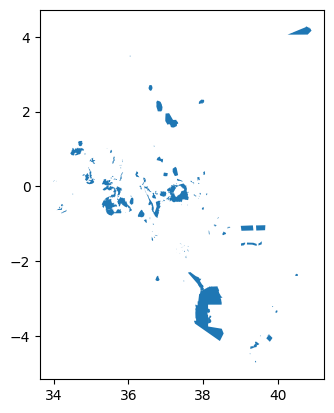

In [638]:
#plotting
for_reserves.geometry.plot()

3. DATASET WITH DATA ON CONSERVANCIES

In [639]:
conservancy_gdp=gpd.read_file('/content/drive/MyDrive/Capstone Project/WDPA_WDOECM_Apr2025_Public_KEN_shp_2')


/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'WDPA_WDOECM_Apr2025_Public_KEN_shp_2': 'WDPA_WDOECM_Apr2025_Public_KEN_shp-points' (default), 'WDPA_WDOECM_Apr2025_Public_KEN_shp-polygons'. Specify layer parameter to avoid this warning.
  result = read_func(


* CHECKING DATA ATTRIBUTES

In [640]:
conservancy_gdp.head()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry
0,555549151.0,555549151,1,Vanga,Vanga,Locally Managed Marine Area,Locally Managed Marine Area,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,Not Reported,1700,KE-300,KEN,KEN,Not Applicable,Not Applicable,MULTIPOINT ((39.21936 -4.66067))
1,61668.0,61668,1,Ol Ari Nyiro Conservancy,Ol Ari Nyiro Conservancy,Private Reserve,Private Reserve,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,State Verified,745,KE-700,KEN,KEN,Not Applicable,Not Applicable,MULTIPOINT ((36.25 0.71667))
2,33477.0,33477,1,Motunyi Hill,Motunyi Hill,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,State Verified,178,KE-400,KEN,KEN,Not Applicable,Not Applicable,MULTIPOINT ((37.5 0.3))
3,68333.0,68333,1,Kisere,Kisere,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,State Verified,178,KE-800,KEN,KEN,Not Applicable,Not Applicable,MULTIPOINT ((34.8833 0.4))
4,68335.0,68335,1,Muumoni,Muumoni,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,State Verified,178,KE-400,KEN,KEN,Not Applicable,Not Applicable,MULTIPOINT ((37.9833 -0.5167))


In [641]:
conservancy_gdp.tail()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry
11,7775.0,7775,1,Kirimiri,Kirimiri,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,State Verified,178,KE-400,KEN,KEN,Not Applicable,Not Applicable,MULTIPOINT ((37.5333 -0.4))
12,7779.0,7779,1,Kyawea,Kyawea,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,State Verified,178,KE-400,KEN,KEN,Not Applicable,Not Applicable,MULTIPOINT ((38.0333 -1.2333))
13,7801.0,7801,1,Mount Kulal,Mount Kulal,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,State Verified,178,KE-400,KEN,KEN,Not Applicable,Not Applicable,MULTIPOINT ((36.9333 2.7167))
14,7804.0,7804,1,Mutiluni,Mutiluni,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,State Verified,178,KE-400,KEN,KEN,Not Applicable,Not Applicable,MULTIPOINT ((38.1167 -1.4833))
15,7815.0,7815,1,Njukini East,Njukini East,Forest Reserve,Forest Reserve,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,State Verified,178,KE-400,KEN,KEN,Not Applicable,Not Applicable,MULTIPOINT ((37.4333 -0.4833))


In [642]:
#shape
print(conservancy_gdp.shape)
print("Number of rows:", conservancy_gdp.shape[0])
print("Number of columns:", conservancy_gdp.shape[1])

(16, 29)
Number of rows: 16
Number of columns: 29


In [643]:
#datatypes
conservancy_gdp.dtypes

,0
WDPAID,float64
WDPA_PID,object
PA_DEF,object
NAME,object
ORIG_NAME,object
DESIG,object
DESIG_ENG,object
DESIG_TYPE,object
IUCN_CAT,object
INT_CRIT,object


In [644]:
#columns
conservancy_gdp.columns

Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'REP_AREA', 'NO_TAKE', 'NO_TK_AREA', 'STATUS',
       'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE', 'MANG_AUTH', 'MANG_PLAN', 'VERIF',
       'METADATAID', 'SUB_LOC', 'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ',
       'geometry'],
      dtype='object')

<Axes: >

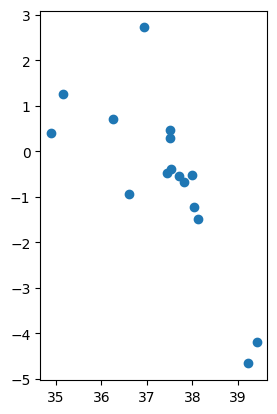

In [645]:
#plotting
conservancy_gdp.geometry.plot()

4. DATASET WITH KENYAN PIPELINE DATA

In [646]:
pipe=gpd.read_file('/content/drive/MyDrive/Capstone Project/Kenya Pipeline')


* CHECKING DATA ATTRIBUTES

In [647]:
pipe.head()

,ID,type,geometry
0,141167,Above ground pipelines,"LINESTRING (37.86805 0.31375, 37.89183 0.41657..."
1,141200,Underground pipelines,"LINESTRING (36.88664 -1.41606, 36.90792 -1.436..."
2,141202,Above ground pipelines,"LINESTRING (36.04827 -1.80182, 36.05751 -1.804..."
3,141205,Underground pipelines,"LINESTRING (37.96168 -2.4308, 37.94409 -2.3664..."
4,141207,Underground pipelines,"LINESTRING (38.13518 -2.65401, 38.12954 -2.627..."


In [648]:
pipe.tail()

,ID,type,geometry
33,141273,Underground pipelines,"LINESTRING (39.37067 -3.87297, 39.24469 -3.874..."
34,141274,Underground pipelines,"LINESTRING (38.8646 -3.67735, 38.89452 -3.69731)"
35,141275,Underground pipelines,"LINESTRING (39.37067 -3.87297, 39.48417 -3.87041)"
36,141276,Underground pipelines,"LINESTRING (39.56903 -3.93474, 39.58576 -3.95773)"
37,141277,Above ground pipelines,"LINESTRING (39.4593 -3.87977, 39.44254 -3.87032)"


In [649]:
#shape
print(pipe.shape)
print("Number of rows:", pipe.shape[0])
print("Number of columns:", pipe.shape[1])

(38, 3)
Number of rows: 38
Number of columns: 3


In [650]:
#datatypes
pipe.dtypes

,0
ID,int64
type,object
geometry,geometry


In [651]:
#checking columns
pipe.columns

Index(['ID', 'type', 'geometry'], dtype='object')

<Axes: >

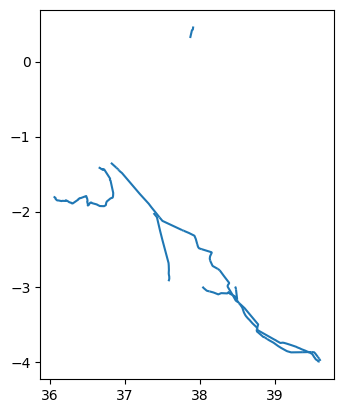

In [652]:
#PLOTTING
pipe.geometry.plot()

### **WHAT IS THE CRS OF ORIGINAL GEOPANDAS DATAFRAMEs**

In [653]:
print(ecological.crs)
print(for_reserves.crs)
print(conservancy_gdp.crs)
print(pipe.crs) #None

EPSG:4326
EPSG:4326
EPSG:4326
None


* Setting the crs for pipeline data to  EPSG:4326 for latitude and longitude


**A Coordinate Reference System (CRS) tells your GIS software how to interpret coordinates on Earth.**

Think of it like this:

Raw coordinates like (36.8219, -1.2921) are just numbers.
* **EPSG:4326** is a Coordinate Reference System (CRS) that defines how locations on Earth are described in terms of coordinates.

In Practical Terms:

EPSG:4326 uses:

* Latitude and Longitude

* **Units are in degrees** - EPSG:4326 uses degrees, not meters. Thus we cannot use it as is to calculate distances

* **It is a global coordinate system (used in GPS!)**

Example point in EPSG:4326:

(36.8219, -1.2921)

In [654]:
#setting crs
pipe = pipe.set_crs(epsg=4326)

#checking
print(pipe.crs)

EPSG:4326


* We've set the geometry data to coordinates, now our computer interprates the geoseries data as coordinates not just numbers

# FEATURE ENGINEERING

## ADDING A COLUMN TO FACTOR GEOMETRIC CALCULATIONS

### 1. ADDING A DISTANCE COLUMN FOR EACH PIPE SEGMENT

* Column factors in the distance in metres between various points of a pipeline



1. Explode LineStrings into Points

Each LineString has multiple (lon, lat) points.

You need to:

1. Break them up into individual points.

* Why - This is one long LineString represents a whole pipeline SEGMENT path, possibly with many bends or turns.

2. Convert each LineString to a set of points so that we can analyze point-to-point elevation and distance.

For example:
LINESTRING (A, B, C) → Points: A → B → C

3. Create a new Geopandas dataframe that contains the segmented pipeline data with increased indexes

In [655]:

# Step 1: Exploding the LineString into individual segments (point pairs)
segments = []

for idx, row in pipe.iterrows():
    coords = list(row.geometry.coords)
    for i in range(len(coords) - 1):
        from_point = Point(coords[i])
        to_point = Point(coords[i + 1])
        segment = {
            'pipeline_id': row['ID'],
            'type': row['type'],  # carry over type info!
            'geometry': LineString([from_point, to_point])
        }
        segments.append(segment)

# Create GeoDataFrame of segments
segments_gdf = gpd.GeoDataFrame(segments, crs="EPSG:4326")


* with crs set to EPSG:4326 the geometry column above stores the exact locations of the various pipe segments of the pipeline in Kenya

* points are exact locations on a map pr in gis e.g. locating a point on the X and Y axis point z = (2,4)


In [656]:
# Step 2: Convert EPSG:4326 to UTM for precise distance calculations
segments_gdf_utm = segments_gdf.to_crs(epsg=32737)  # UTM zone for Kenya
segments_gdf['segment_distance'] = segments_gdf_utm.geometry.length  # Add distance back to WGS84 version

#checking
segments_gdf.head()

,pipeline_id,type,geometry,segment_distance
0,141167,Above ground pipelines,"LINESTRING (37.86805 0.31375, 37.89183 0.41657)",11670.927717
1,141167,Above ground pipelines,"LINESTRING (37.89183 0.41657, 37.90369 0.42551)",1648.939695
2,141167,Above ground pipelines,"LINESTRING (37.90369 0.42551, 37.9045 0.43122)",637.647528
3,141167,Above ground pipelines,"LINESTRING (37.9045 0.43122, 37.90965 0.46724)",4023.061024
4,141200,Underground pipelines,"LINESTRING (36.88664 -1.41606, 36.90792 -1.43604)",3239.585203


* segments_gdf uses EPSG:4326, which is a geographic coordinate system and Coordinates are in latitude and longitude (degrees).
* It's great for location, **but NOT ideal for measuring distance or area.** Why? **Because 1 degree ≠ fixed number of meters** (it varies depending on where you are on Earth).
* Thus If we calculate geometry.length directly in EPSG:4326, you'll get results in degrees, which is meaningless for real-world distances.


---

### **UTM(Universal Transverse Mercator)**

* **Remember** : The Earth is a  is round 🌍 or a **3D sphere (technically an ellipsoid).** But **maps are flat 🗺️**.

* Thus when we try to flatten the Earth and measure distances, distortions happen — i.e. the distances, shapes, and areas can get stretched or squished.

* To accurately show it on a **2D map or screen**, we need a projection — **a mathematical transformation from the curved surface to flat coordinates.**

* This is where UTM comes in, it works by **"cutting" the world into 60 vertical strips, each 6° wide, and flatten each strip separately. That way, the distortion in each strip is small.”**



* This distortion from stretching distances in a sphere is why we convert to a Projected CRS (UTM):

*  UTM is **a projected coordinate system designed for accuracy in local areas.**

*segments_gdf_utm = segments_gdf.to_crs(epsg=32737)*

* This converts your GeoDataFrame to EPSG:32737, which is a **UTM projection (Universal Transverse Mercator) tailored for southern Kenya.**

---



### Why Do We Convert to UTM?
* **WGS84 (EPSG:4326) gives coordinates in degrees, which is not ideal for distance or angle math.**

* **UTM gives us X and Y in meters**, so we can:

1. Compute how long a segment is

2. Compute angles between segments

3. Use vector math accurately



Checking the Exploding

In [657]:
pipe.iloc[0:3]

,ID,type,geometry
0,141167,Above ground pipelines,"LINESTRING (37.86805 0.31375, 37.89183 0.41657..."
1,141200,Underground pipelines,"LINESTRING (36.88664 -1.41606, 36.90792 -1.436..."
2,141202,Above ground pipelines,"LINESTRING (36.04827 -1.80182, 36.05751 -1.804..."


**each LineString originally represented the full path of a pipeline or each line represents the full path of a pipeline**

> Add blockquote



In [658]:
segments_gdf.iloc[0:3]

,pipeline_id,type,geometry,segment_distance
0,141167,Above ground pipelines,"LINESTRING (37.86805 0.31375, 37.89183 0.41657)",11670.927717
1,141167,Above ground pipelines,"LINESTRING (37.89183 0.41657, 37.90369 0.42551)",1648.939695
2,141167,Above ground pipelines,"LINESTRING (37.90369 0.42551, 37.9045 0.43122)",637.647528




### **Segmenting Pipelines into Individual Segments**

The original `pipe` dataset contains `LineString` geometries, where each line represents the full path of a pipeline.

To enable more detailed spatial analysis (like calculating distances or angle changes between segments), we break these `LineStrings` into smaller segments — each connecting two consecutive points.

- Each of these new segments carries the **same `pipeline_id`** and **type** as the original line.
- The **distances differ**, because each segment represents a unique portion of the overall path.
- This transformation helps us:
  - Measure distance per segment that is To calculate accurate distances per segment: Using UTM projection.

  - Calculate changes in direction (angles) that is analyze curvature or bending: You can now measure angles between individual segments.

  - Understand how pipelines twist, turn, or branch out, allows us to better visualize or simulate pipeline behavior: Easier to assess each bend and how sharp it is.


In [659]:
#checking shape
print("Number of rows:", segments_gdf.shape[0])
print("Number of columns:", segments_gdf.shape[1])

Number of rows: 259
Number of columns: 4


* Has increased number of rows as a result of exploding the Linestring coordinates into points

### **ADDING total_length COLUMN to Pipeline Dataset**

* Add a column to the original pipe dataframe that calculates the total pipeline length (sum of its segments) in metres

* We will be using the segment distance calculated above to obtain total distance of the pipe segment



In [660]:

# Step 1: Group UTM segments by pipeline_id and calculate total length in meters
total_lengths = segments_gdf.groupby("pipeline_id")["segment_distance"].sum().reset_index()
total_lengths.rename(columns={"segment_distance": "total_length"}, inplace=True)

# Step 2: Merge total lengths into original pipe (still in EPSG:4326)
pipe = pipe.merge(total_lengths, left_on="ID", right_on="pipeline_id", how="left")

# Step 3: Drop the duplicate column if needed
pipe.drop(columns=["pipeline_id"], inplace=True)

# Optional: Preview
pipe.head()


,ID,type,geometry,total_length
0,141167,Above ground pipelines,"LINESTRING (37.86805 0.31375, 37.89183 0.41657...",17980.575964
1,141200,Underground pipelines,"LINESTRING (36.88664 -1.41606, 36.90792 -1.436...",3537.185617
2,141202,Above ground pipelines,"LINESTRING (36.04827 -1.80182, 36.05751 -1.804...",172878.033727
3,141205,Underground pipelines,"LINESTRING (37.96168 -2.4308, 37.94409 -2.3664...",30309.540092
4,141207,Underground pipelines,"LINESTRING (38.13518 -2.65401, 38.12954 -2.627...",28184.007308




###2. **PIPELINE CURVATURE**

* **Curvature describes how much something bends**. For pipelines:

1. A straight line has 0° curvature between segments.

2. A sharp turn has larger angles between segments.

* **NOTE:** - **High curvature = sharper turns, while low curvature = straighter pipelines**

* **Measuring curvature helps in:**

1. Maintenance planning (turns can stress pipelines)

2. Hydraulic modeling (bends affect pressure)

3. Designing routing improvements




---



### **Calculating  Curvature:**

Involves:

**1. Calculating the angle between two consecutive segments (you can use the geometry of the points).**

* This involves:
* a).This involves using the exploded LineString coordinates as Point pairs then calculating the angle between each consecutive segment.

* b.) Calculating the Angle Between Two Segments:

  **To get the angle between two consecutive segments, we can use vector math**. Specifically, we compute the angle between two vectors (representing the two consecutive segments).

**2. Detecting sharp bends based on threshold values for the angles**





Curvature here is captured **using angles between consecutive segments (in degrees)**.

We’ll therefore calculate :

1. Mean curvature (average angle between segments)

2. Max curvature (sharpest turn)

3. Std dev of curvature (how much the angles vary)

# Column for calculating curvature


In [661]:
# Step 1: Use UTM version for accurate vector calculations
segments_gdf_utm = segments_gdf.to_crs(epsg=32737)

# Step 2: Function to extract vector from a LineString
def get_vector(linestring):
    coords = list(linestring.coords)
    x1, y1 = coords[0]
    x2, y2 = coords[1]
    return np.array([x2 - x1, y2 - y1])

# Step 3: Compute angles in UTM space
angles = []

for pid, group in segments_gdf_utm.groupby("pipeline_id"):
    group = group.reset_index(drop=True)

    for i in range(len(group)):
        if i == 0:
            angles.append(np.nan)
            continue

        seg1 = group.loc[i - 1, "geometry"]
        seg2 = group.loc[i, "geometry"]

        v1 = get_vector(seg1)
        v2 = get_vector(seg2)

        norm_v1 = np.linalg.norm(v1)
        norm_v2 = np.linalg.norm(v2)

        if norm_v1 == 0 or norm_v2 == 0:
            angle = np.nan
        else:
            dot = np.dot(v1, v2)
            cos_theta = np.clip(dot / (norm_v1 * norm_v2), -1, 1)
            angle = np.degrees(np.arccos(cos_theta))

        angles.append(angle)

# Step 4: Assign back to the original WGS84 GeoDataFrame
segments_gdf["angle_segments"] = angles


In [662]:
#CHECKING
segments_gdf.head()

,pipeline_id,type,geometry,segment_distance,angle_segments
0,141167,Above ground pipelines,"LINESTRING (37.86805 0.31375, 37.89183 0.41657)",11670.927717,NaN
1,141167,Above ground pipelines,"LINESTRING (37.89183 0.41657, 37.90369 0.42551)",1648.939695,40.069480
2,141167,Above ground pipelines,"LINESTRING (37.90369 0.42551, 37.9045 0.43122)",637.647528,45.047826
3,141167,Above ground pipelines,"LINESTRING (37.9045 0.43122, 37.90965 0.46724)",4023.061024,0.063638
4,141200,Underground pipelines,"LINESTRING (36.88664 -1.41606, 36.90792 -1.43604)",3239.585203,NaN


* **NaN values** here represent that there was no previous segment or the pipeline is straight thus no bends present

Key Ideas for Curving Pipelines:

1. **Curvature of LineString Segments**:

* Curvature refers to how sharply a curve deviates from a straight line. **For pipeline analysis, sharp curves may represent areas that need more attention in terms of material strength or monitoring.**

2. **Using Angles Between Segments:**

* We can calculate the angle between two consecutive LineString segments, **which can help you determine where a pipeline curves.**

3. **Refining the model:**

* By analyzing the changes in direction between consecutive points (or segments), you can build a more refined model that accounts for the curvature of the pipeline.

* You could use angles between consecutive points as features to train a model that predicts the optimal path or detects sharp turns.

In [663]:
# Cleaning column name and values in 'type' column
segments_gdf.rename(columns={'type': 'pipe_location'}, inplace=True)

# Replace values in 'pipe_location' column
segments_gdf['pipe_location'] = segments_gdf['pipe_location'].replace({
    'Above ground pipelines': 'Above ground',
    'Underground pipelines': 'Underground'
})

# checking
segments_gdf

,pipeline_id,pipe_location,geometry,segment_distance,angle_segments
0,141167,Above ground,"LINESTRING (37.86805 0.31375, 37.89183 0.41657)",11670.927717,NaN
1,141167,Above ground,"LINESTRING (37.89183 0.41657, 37.90369 0.42551)",1648.939695,40.069480
2,141167,Above ground,"LINESTRING (37.90369 0.42551, 37.9045 0.43122)",637.647528,45.047826
3,141167,Above ground,"LINESTRING (37.9045 0.43122, 37.90965 0.46724)",4023.061024,0.063638
4,141200,Underground,"LINESTRING (36.88664 -1.41606, 36.90792 -1.43604)",3239.585203,NaN
...,...,...,...,...,...
254,141273,Underground,"LINESTRING (38.91152 -3.70797, 38.89452 -3.69731)",2225.311744,0.023028
255,141274,Underground,"LINESTRING (38.8646 -3.67735, 38.89452 -3.69731)",3988.322306,NaN
256,141275,Underground,"LINESTRING (39.37067 -3.87297, 39.48417 -3.87041)",12604.606929,NaN
257,141276,Underground,"LINESTRING (39.56903 -3.93474, 39.58576 -3.95773)",3147.713632,NaN


## Adding data on Ecological sites

##Plotting map showing pipelines in Kenya


In [664]:
import geopandas as gpd
import folium
from shapely.geometry import LineString, Point
from folium import GeoJson, LayerControl

# Ensure CRS is set to EPSG:4326 for latitude and longitude
pipe = pipe.set_crs(epsg=4326)

# Step 1: Exploding the LineString into individual segments (point pairs)
segments = []

for idx, row in pipe.iterrows():
    coords = list(row.geometry.coords)
    for i in range(len(coords) - 1):
        from_point = Point(coords[i])
        to_point = Point(coords[i + 1])
        segment = {
            'pipeline_id': row['ID'],
            'type': row['type'],  # carry over type info!
            'geometry': LineString([from_point, to_point])
        }
        segments.append(segment)

# Create GeoDataFrame of segments
segments_gdf = gpd.GeoDataFrame(segments, crs="EPSG:4326")

# Step 2: Convert to UTM for precise distance calculations
segments_gdf_utm = segments_gdf.to_crs(epsg=32737)  # UTM zone for Kenya
segments_gdf['distance_m'] = segments_gdf_utm.geometry.length  # Add distance back to WGS84 version

# Clean up the 'type' column to 'pipe_location' and adjust values
segments_gdf.rename(columns={'type': 'pipe_location'}, inplace=True)
segments_gdf['pipe_location'] = segments_gdf['pipe_location'].replace({
    'Above ground pipelines': 'Above ground',
    'Underground pipelines': 'Underground'
})

# Define map centered on Kenya with limited zoom
m = folium.Map(
    location=[0.5, 37.5],
    zoom_start=4,
    min_zoom=5,
    max_zoom=7,
    tiles="CartoDB positron",
    max_bounds=True
)
m.fit_bounds([[-5, 33], [6, 42]])

# Define colors for Above Ground and Underground pipelines
def pipeline_color(feature):
    if feature['properties']['pipe_location'] == 'Above ground':
        return 'red'
    else:
        return 'yellow'

# Add pipeline segments as a GeoJSON layer
folium.GeoJson(
    segments_gdf,
    style_function=lambda feature: {
        'color': pipeline_color(feature),
        'weight': 2,
        'opacity': 0.7
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['pipeline_id', 'pipe_location', 'distance_m'],
        aliases=['Pipeline ID:', 'Location:', 'Distance (m):'],
        localize=True
    ),
    name='Pipelines'
).add_to(m)

# Styling functions for ecological sites
def ecological_style(feature):
    return {'fillColor': 'green', 'color': 'green', 'weight': 1, 'fillOpacity': 0.3}

def forest_style(feature):
    return {'fillColor': 'blue', 'color': 'blue', 'weight': 1, 'fillOpacity': 0.3}

def conserve_style(feature):
    return {'fillColor': 'purple', 'color': 'purple', 'weight': 1, 'fillOpacity': 0.3}


# Feature Groups for ecological sites
ecological_layer = folium.FeatureGroup(name='National Parks')
forest_layer = folium.FeatureGroup(name='Forest Reserves')
conserve_layer = folium.FeatureGroup(name='Conservancies')

# Add shaded polygon layers (no tooltips)
GeoJson(ecological, style_function=ecological_style, name='National Parks').add_to(ecological_layer)
GeoJson(for_reserves, style_function=forest_style, name='Forest Reserves').add_to(forest_layer)
GeoJson(conservancy_gdp, style_function=conserve_style, name='Conservancies').add_to(conserve_layer)

# Add ecological site layers to map
ecological_layer.add_to(m)
forest_layer.add_to(m)
conserve_layer.add_to(m)

# Add layer control
folium.LayerControl(collapsed=False).add_to(m)

# Display the map
m


2. Convert Coordinates to UTM (for accurate distance)

Lat/Lon can't be used directly for distance calculations because they're in degrees.

Convert to a projected CRS (e.g., UTM Zone 37S) which uses meters.

3. Sample Elevation for Each Point

For each point (after CRS conversion), extract elevation from a Digital Elevation Model (DEM).

DEM = raster file with elevation values (like a .tif file).

You can use rioxarray.sample() or rasterio.sample() to get elevation from a DEM.